In [141]:
import sys
from qiskit import*
#from qiskit import Aer
import qiskit.quantum_info as qi
import numpy as np
#from math import pi
#import matplotlib.pyplot as plt
import re

In [142]:
L = 4;

# Circuit for the $L$ qubit Toffoli gate

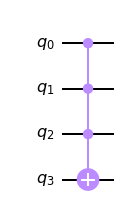

In [143]:
qc = QuantumCircuit(L)
qc.mcx([i for i in range(L-1)],L-1)
qc.draw("mpl",style="clifford")

# Transpiling the $L$ qubit Toffoli gate

/Users/sasankadowarah/opt/anaconda3/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


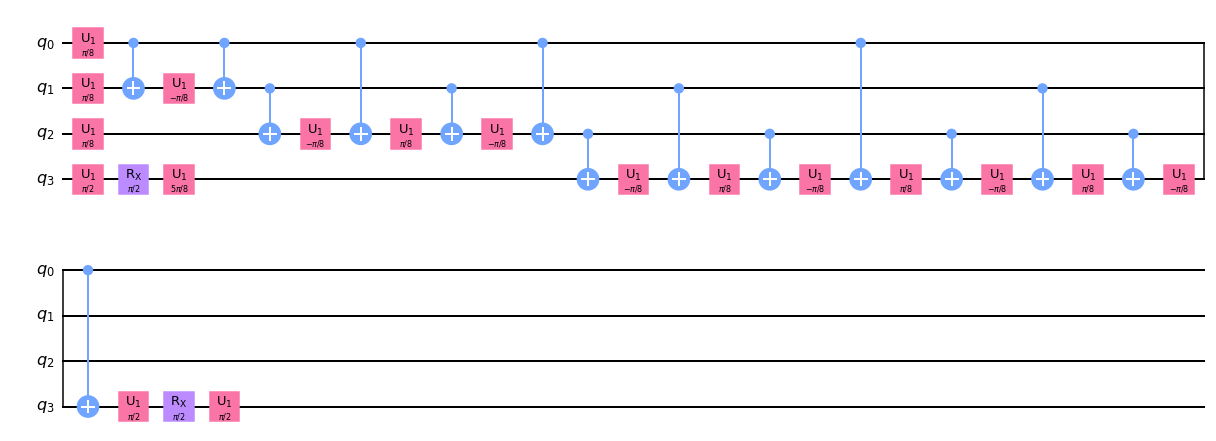

In [150]:
trans_qc = transpile(qc, basis_gates = ['u1','rx','cx'], optimization_level = 3)
#trans_qc = transpile(qc, basis_gates = ['rz','cx','h'], optimization_level = 3)
#trans_qc.draw("mpl")
trans_qc.draw("mpl")
#len(trans_qc)

In [145]:
def extract_gate_details(gate_index, gate_instruction_string):
    
    gate_string = str(gate_instruction_string[gate_index])
    gate_as_list = []
    
    # u1 gate.
    if "u1" in gate_string:
        
        # Extract the number using a more specific pattern
        number_match = re.search(r"params=\[([-\d.]+)\]", gate_string)
        angle = number_match.group(1)  # '0.09817477042468103'

        # Extract the qubit index using a tailored pattern
        qubit_index_match = re.search(r"Qubit\(.*?, (\d+)\)", gate_string)
        qubit_acted_on = qubit_index_match.group(1)  # '4'
            
        gate_as_list.append(["u1",angle,qubit_acted_on])
        
        
    # rz gate.
    elif "rz" in gate_string:

        # Extract the number using a more specific pattern
        number_match = re.search(r"params=\[([-\d.]+)\]", gate_string)
        angle = number_match.group(1)  # '0.09817477042468103'

        # Extract the qubit index using a tailored pattern
        qubit_index_match = re.search(r"Qubit\(.*?, (\d+)\)", gate_string)
        qubit_acted_on = qubit_index_match.group(1)  # '4'
            
        gate_as_list.append(["rz",angle,qubit_acted_on])        
        
        
        
    # rx gate.
    elif "rx" in gate_string:
        
        # Extract the number using a more specific pattern
        number_match = re.search(r"params=\[([-\d.]+)\]", gate_string)
        angle = number_match.group(1)  # '0.09817477042468103'

        # Extract the qubit index using a tailored pattern
        qubit_index_match = re.search(r"Qubit\(.*?, (\d+)\)", gate_string)
        qubit_acted_on = qubit_index_match.group(1)  # '4'
            
        gate_as_list.append(["rx",angle,qubit_acted_on])
        
    # controlled gate.    
    elif "cx" in gate_string:
        match = re.search(r"(\d+)(?=\), Qubit\(QuantumRegister)", gate_string)
        if match:
            control_qubit =  int(match.group())
                
        match = re.search(r"(\d+)(?=\)\), clbits=\(\))", gate_string)
        if match:
            target_qubit = int(match.group())

        gate_as_list.append(["cx",control_qubit,target_qubit])
        
    # hadamard gate.    
    elif "h" in gate_string:
        match = re.search(r"(\d+)(?=\),\), clbits=\(\))", string)
        if match:
            qubit_acted_on = int(match.group(1))
        gate_as_list.append(["h", qubit_acted_on, qubit_acted_on ])    
    else:
        print("Kant")
    return gate_as_list

In [151]:
trans_qc[2]

CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1)), clbits=())

In [147]:
trans_qc[5]

CircuitInstruction(operation=Instruction(name='u1', num_qubits=1, num_clbits=0, params=[0.39269908169872414]), qubits=(Qubit(QuantumRegister(4, 'q'), 2),), clbits=())

In [148]:
# search for qubits
string = str(trans_qc[0])
match = re.search(r"(\d+)(?=\),\), clbits=\(\))", string)
int(match.group(1))

0

In [149]:
file = open('gates_list_'+str(L)+'.txt', 'w')


# U_0.
for i in range(L):
    # gate qubit qubt.
    file.write("x" + "\t" + str(i) + "\t" + str(i) + "\n")
    
file.write("h" + "\t" + str(L-1) + "\t" + str(L-1) + "\n")
for i in range(len(trans_qc)):
    print(i)
    gate_as_list = extract_gate_details(i,trans_qc)[0]
    print(gate_as_list)
    file.write(gate_as_list[0] + "\t" + str(gate_as_list[1]) + "\t" + str(gate_as_list[2]) + "\n")
file.write("h" + "\t" + str(L-1) + "\t" + str(L-1) + "\n")

for i in range(L):
    # gate qubit qubt.
    file.write("x" + "\t" + str(i) + "\t" + str(i) + "\n")

# U_x.
for i in range(L-1):
    file.write("h" + "\t" + str(i) + "\t" + str(i) + "\n")
    
for i in range(L-1):
    file.write("x" + "\t" + str(i) + "\t" + str(i) + "\n")
    
file.write("z" + "\t" + str(L-1) + "\t" + str(L-1) + "\n") 
for i in range(len(trans_qc)):
    gate_as_list = extract_gate_details(i,trans_qc)[0]
    file.write(gate_as_list[0] + "\t" + str(gate_as_list[1]) + "\t" + str(gate_as_list[2]) + "\n")
file.write("z" + "\t" + str(L-1) + "\t" + str(L-1) + "\n") 

for i in range(L-1):
    file.write("x" + "\t" + str(i) + "\t" + str(i) + "\n")
    
for i in range(L-1):
    file.write("h" + "\t" + str(i) + "\t" + str(i) + "\n")
    
file.close()

0
['u1', '0.39269908169872414', '0']
1
['u1', '0.39269908169872414', '1']
2
['cx', 0, 1]
3
['u1', '-0.39269908169872414', '1']
4
['cx', 0, 1]
5
['u1', '0.39269908169872414', '2']
6
['cx', 1, 2]
7
['u1', '-0.39269908169872414', '2']
8
['cx', 0, 2]
9
['u1', '0.39269908169872414', '2']
10
['cx', 1, 2]
11
['u1', '-0.39269908169872414', '2']
12
['cx', 0, 2]
13
['u1', '1.5707963267948966', '3']
14
['rx', '1.5707963267948966', '3']
15
['u1', '1.9634954084936211', '3']
16
['cx', 2, 3]
17
['u1', '-0.39269908169872414', '3']
18
['cx', 1, 3]
19
['u1', '0.39269908169872414', '3']
20
['cx', 2, 3]
21
['u1', '-0.39269908169872414', '3']
22
['cx', 0, 3]
23
['u1', '0.39269908169872414', '3']
24
['cx', 2, 3]
25
['u1', '-0.39269908169872414', '3']
26
['cx', 1, 3]
27
['u1', '0.39269908169872414', '3']
28
['cx', 2, 3]
29
['u1', '-0.39269908169872414', '3']
30
['cx', 0, 3]
31
['u1', '1.5707963267948966', '3']
32
['rx', '1.5707963267948966', '3']
33
['u1', '1.5707963267948966', '3']
